# The Sparks Foundation -Data Science and Business Analytics Tasks

# Prediction using supervised ML

**Created by Sayantan Chakraborty**




---


-----Intern at Data Science & Business Analytics intern in its Graduate Rotational Internship Program (GRIP) at The Sparks Foundation



Q1. (To Explore Supervised Machine Learning)
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing Libraries and extracting the dataset 

In [30]:
#importing all the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yellowbrick as yb
plt.style.use('ggplot')

In [31]:
data = pd.read_csv('http://bit.ly/w-data')
print('shape of the data set is', data.shape)
data.head(10)

shape of the data set is (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


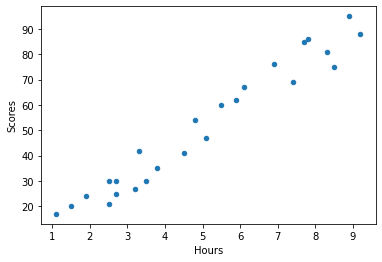

In [14]:

data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

***From the above graph, we can conclude that there is positive relation between the number of hours studies and percentage of score. Now dividing the data into attributes and labels***

In [13]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In the next step, we will use Scikit-Learn's built-in train_set_split() method to split our data into training and test sets.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

#Training the Algorithm

In [17]:
from sklearn.linear_model import LinearRegression
R1=LinearRegression()
R1.fit(X,y)
print("Training the model")

Training the model


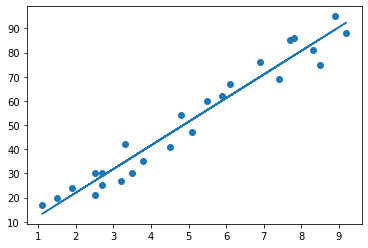

In [18]:
#plotting regression line
line=R1.coef_*X+R1.intercept_
mt.scatter(X,y)
mt.plot(X,line)
mt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Scores')

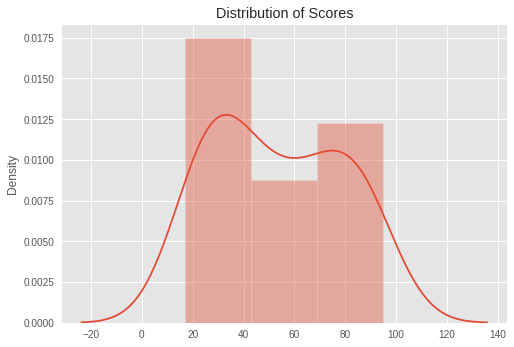

In [33]:
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hours VS Scores')

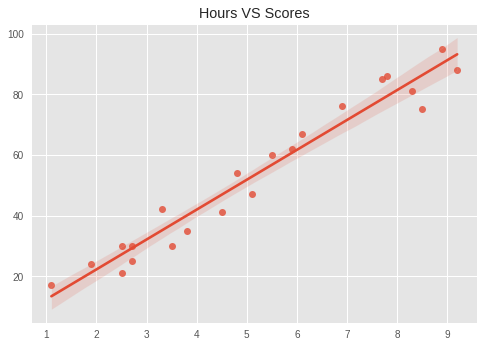

In [34]:
sns.regplot(X_train, y_train)
plt.title('Hours VS Scores')

# Prediction

In [19]:
#testing data
print(X_test)
y_pred=R1.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
#comparing actual vs predicted
df=pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [36]:
print("Training Score:",R1.score(X_train,y_train))
print("Testing Score: ",R1.score(X_test,y_test))
regressor = LinearRegression()

Training Score: 0.9526058112287942
Testing Score:  0.9374615390801261


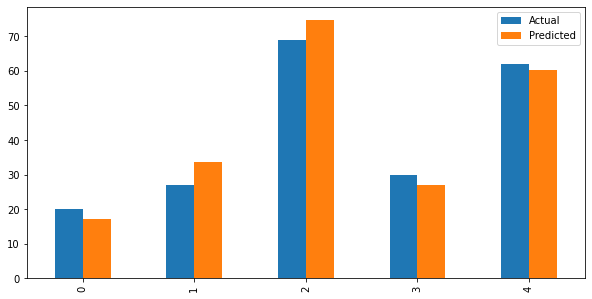

In [23]:
#plotting the actual and predicted value into bar graph
df.plot(kind="bar", figsize=(10,5))
mt.show()

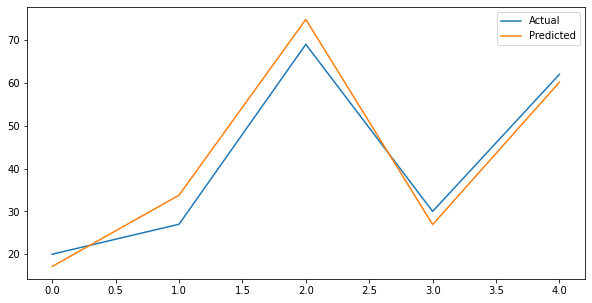

In [24]:
#plotting the actual and predicted value into bar graph
df.plot(kind="line", figsize=(10,5))
mt.show()

In [25]:
#predicting for 9.25 hrs per day
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred_val=R1.predict(test)
print("No. of hours=", hours)
print("Predicted Score=", pred_val[0])

No. of hours= 9.25
Predicted Score= 92.9098547701573


# Visualizing the result

In [40]:
#fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
#predicting the test set results
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


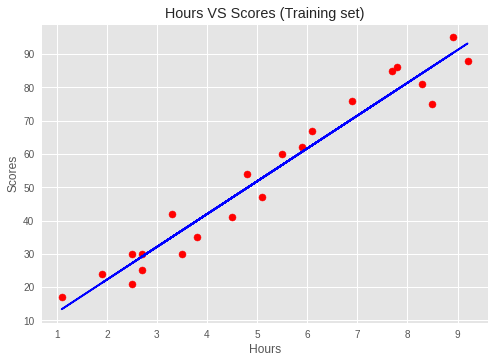

In [44]:
#visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

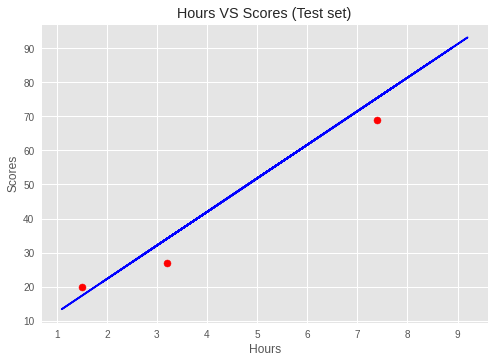

In [45]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Model Evaluation

In [46]:
k = X_test.shape[1]
n = len(X_test)
n

3

In [47]:
from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2) 

R2 = 0.9298077534821835 
Adjusted R2 = 0.859615506964367


#  Predicting Future Data

In [48]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', my_pred)

Hours = 9.25 
Prediction = [93.67656425]
